In [1]:
using JLD
using PyPlot
using Statistics, StatsBase #mean and std

In [2]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP) #cuantos cuadros hay

2000

In [3]:
DatosCMP[1337]

83×3 Array{Float64,2}:
 56.6458    7.36196   17.6792
 51.1547    2.95859   35.0012
 31.8368   23.8453    32.9296
 63.0976   56.9914    38.6804
 56.6326   50.6631    76.7433
  5.40743  34.117     49.3687
 26.3859   29.8833    40.1037
 54.5827   27.6771    41.2686
 42.5711    9.18131   47.2493
 38.1718   22.2212    21.6175
 53.9741   38.7809    15.9524
  3.78011  58.7839    15.5167
 25.2995   56.1111   216.564 
  ⋮                          
 18.3771   58.4491    33.3549
 45.5718   18.3869    58.2111
  9.9672   40.1501    39.4087
 38.8371   32.2749    36.4274
 40.2815   18.759     22.4502
 39.5743   63.1783   399.349 
  3.87119  48.7651    55.9999
 24.3479   24.1827    53.0432
  2.412    10.5233    33.0711
 49.1141   50.6049    37.0693
 63.6691   49.7238    20.0149
 50.5328   34.7027    36.9648

In [4]:
DatosCMP[1341]

91×3 Array{Float64,2}:
 16.9233   30.6356    49.8932
 14.2005   62.0       27.4387
 44.9154   15.8225    24.0242
 19.306     5.74008   26.0908
 41.3845   12.6281    55.6523
 37.5174   63.2014   233.159 
 11.2154   22.9842    30.8148
 12.3875   50.3651    54.1826
 33.8663    3.97144   95.0296
 20.9743   62.541     21.9201
 10.4353   12.408     52.9457
 10.7588   53.2344    31.5709
 31.2726   47.6283    74.2546
  ⋮                          
 61.9817   19.1807    19.7678
  9.52775  61.5209    29.2413
 60.756    28.7404    23.3925
 19.3017   13.7233    61.8143
 19.3663   19.0293    55.6596
 13.801     4.38367  129.27  
 31.7663   28.0747    26.6813
  3.64829  25.5845    24.4496
 22.0748   47.7652    79.9095
 35.4152   16.7306    30.4561
 16.238    45.361     54.1227
 41.4803   53.0049   392.106 

In [5]:
function leeunmegaarrayarchivos(NomineGeneralis::AbstractString, desde=35, hasta=501)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
            readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
    end


function leunjlddeCM(datos, desde=1, hasta=300)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
        readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
end



leunjlddeCM (generic function with 3 methods)

Para Evocados, hay un par de variables temporales para considerar:
- retrazo: el tiempo en cuadros que hubo desde el comienzo del registro hasta el estimulo
- latencia: el tiempo en cuadros que hubo desde el estimulo hasta que paso algo interesante


In [6]:
freq=7.022 # la frecuencia de muestreo en kHz de los experimentos viejos

if evocada
    retms=5.0 #retrazo en milisec
    latms=4.0 #latencia en milisec
    retrazo=round(Int, retms * freq)
    lat=round(Int, latms * freq)
    desde=retrazo+lat
    hasta=300
else
    retms=0
    latms=0
    retrazo=0
    lat=0
    desde=1
    hasta=nmax
end

2000

In [7]:
function dist2D(x,y)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

function difgordis(x,y)
    result=abs(x-y)/max(abs(x),abs(y))
    return result
end

difgordis (generic function with 1 method)

In [8]:
difgordis(0.21,0.29)

0.27586206896551724

In [9]:
function encuentraTrayectorias(Datos, mincadena=20, mingordo=2.0, desde=1,hasta=20)

toleradist=16.0*sqrt(2)
#toldifgordis=0.33
tau=1
t=1
j=1

Catenario=Dict{Integer, Array{Any}}()
Cadena=[0 0 0 0]
tnum=1
CopiaMegaArray=deepcopy(Datos);
NumFrames=length(Datos)
FakeNumFrames=NumFrames



while t <= FakeNumFrames-1 
    
    tau=t
    
    @label arrrrh
 
        if(CopiaMegaArray[tau]==[])
            
            jmax,nada=0,0
        else
          
     jmax,nada= size(CopiaMegaArray[tau])
        end
    
        
    while j <=jmax && tau<FakeNumFrames
            
            if abs(CopiaMegaArray[tau][j,3]) > mingordo
                
            Eslabon=[transpose(CopiaMegaArray[tau][j,:]) tau]
            Cadena=vcat(Cadena, Eslabon)
         #   println("Papa t: ", t, "  tau: ", tau, " y  j: ",j )
            mindist=2
            kasterisco=1
                
                if CopiaMegaArray[tau+1]==[]
                    kmax,nada=0,0
                else
                kmax, nada= size(CopiaMegaArray[tau+1])
                end
                huboalgo=false
          
        #    kmax=5
            
            for k=1:kmax
                
                EslabonTentativo=CopiaMegaArray[tau+1][k,:]
            #    println(EslabonTentativo)
                    if abs(EslabonTentativo[3])>mingordo
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        mindist=dist
                        kasterisco=k
                        
                       # println(kasterisco, "=k*", k, "=k")
                        huboalgo=true
                    end
                end
            
            end    
            
            if huboalgo && mindist<toleradist
                #quitamos el anterior
                CopiaMegaArray[tau][j,3]=0.0000 
               # println(mindist," ", t, " ", tau+1 ," ", kasterisco )
                
                if tau+1<FakeNumFrames
                    tau+=1
                    j=kasterisco
      #              println("Pepe t: ", t, "  tau: ", tau, " y  j: ",j )
                    @goto arrrrh
                
                else
                    
                    Eslabon=[transpose(CopiaMegaArray[tau+1][kasterisco,:]) tau+1]
                    Cadena=vcat(Cadena, Eslabon)
      #              println("Pipi t: ", t, "  t: ", t, " y  j: ",j )
                    j+=1
                    tau=t
                    
                    if size(Cadena)[1]>mincadena
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                    end
                    
                    Cadena=[0 0 0 0]
                    @goto arrrrh
                end
                                
            else
                
                if size(Cadena)[1]>mincadena
                    # veamos si funciona  mejor como dict 
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                end
                Cadena=[0 0 0 0]
                j+=1
                tau=t
                @goto arrrrh
            end
                       
        end #cierra sobre el if de  la masa 
                
        j+=1                    
        tau=t
    
    end
    @label urrr
      
    j=1
    t+=1
    tau=t
    Cadena=[0 0 0 0]
        end 
    
    return Catenario
end

encuentraTrayectorias (generic function with 5 methods)

In [10]:
(desde, hasta)


(1, 2000)

In [27]:
pesomin=500
longmin=3

3

In [28]:
#Recuerda el segundo argumento es la longitud mínima de la cadena
@time CatenarioPositivo=encuentraTrayectorias(DatosCMP,longmin,pesomin,desde,hasta);


  0.183878 seconds (1.16 M allocations: 40.214 MiB, 7.81% gc time)


In [29]:
CatenarioNegativo=encuentraTrayectorias(DatosCMN,longmin,pesomin,desde,hasta);

In [30]:
nombreout=nombrecm[1:end-6]*"Tray-todas.jld"
nota="longitud minima fue $longmin, peso minimo fue $pesomin "
#save(nombreout, "CatenarioNegativo", CatenarioNegativo, "CatenarioPositivo", CatenarioPositivo, "nota", nota)

"longitud minima fue 3, peso minimo fue 500 "

In [31]:
length(CatenarioPositivo), length(CatenarioNegativo)

(188, 182)

In [32]:
CatenarioPositivo

Dict{Integer,Array{Any,N} where N} with 188 entries:
  11  => Any[44.1631 59.388 750.527 577.0; 44.0373 59.5218 945.099 578.0; 43.79…
  134 => Any[38.7553 55.5844 5967.65 1042.0; 38.3455 55.5394 6179.1 1043.0; … ;…
  158 => Any[21.825 50.1698 507.791 1125.0; 22.1198 50.5972 576.873 1126.0; 22.…
  160 => Any[33.6828 59.6031 3097.24 1129.0; 33.6175 59.2259 3063.63 1130.0; 34…
  29  => Any[52.7993 15.1715 530.475 627.0; 53.838 14.2519 712.701 628.0; … ; 5…
  131 => Any[34.5283 49.3238 1992.69 1025.0; 34.7892 48.6763 1528.84 1026.0; … …
  173 => Any[40.4271 50.9023 1352.62 1196.0; 40.7978 51.0796 1294.41 1197.0; 40…
  74  => Any[32.7544 56.4425 1715.28 768.0; 34.3212 57.6015 1524.2 769.0; 33.60…
  176 => Any[32.7641 58.5676 947.94 1204.0; 32.8323 58.4183 976.206 1205.0; 32.…
  57  => Any[39.9927 7.82734 535.41 725.0; 40.1332 7.98831 579.649 726.0; … ; 4…
  31  => Any[57.6594 21.9314 1324.83 633.0; 57.4424 22.6384 1247.03 634.0; 57.4…
  70  => Any[25.8907 56.5202 578.648 757.0; 26.2762 57.0

In [33]:
nombreout

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"

In [34]:
values(CatenarioNegativo)

Base.ValueIterator for a Dict{Integer,Array{Any,N} where N} with 182 entries. Values:
  Any[30.0128 45.82 -613.293 594.0; 29.7989 45.6104 -725.389 595.0; 29.8667 45.…
  Any[32.0147 53.5725 -8023.32 1068.0; 31.8978 53.6241 -7507.77 1069.0; 31.8804…
  Any[38.608 54.8887 -1603.39 1219.0; 37.0174 55.4568 -1558.71 1220.0; 36.1535 …
  Any[40.1273 7.0875 -627.715 1231.0; 39.8626 6.99845 -695.965 1232.0; … ; 39.1…
  Any[24.9162 53.4952 -1300.94 643.0; 25.1218 53.2569 -1291.49 644.0; … ; 25.48…
  Any[32.7002 51.334 -7206.76 1061.0; 32.131 51.3908 -7635.94 1062.0; 32.1429 5…
  Any[38.8445 55.6901 -1146.9 1317.0; 37.3881 56.0862 -1010.21 1318.0; 35.6951 …
  Any[49.2209 58.4926 -704.083 755.0; 47.7839 58.4642 -643.972 756.0; 47.0873 5…
  Any[39.8615 58.3735 -898.772 1330.0; 37.9801 58.4631 -792.743 1331.0; 37.933 …
  Any[35.0871 48.097 -2673.66 708.0; 34.3749 48.155 -2037.54 709.0; … ; 38.2485…
  Any[50.822 61.001 -1689.32 644.0; 51.375 60.5188 -1635.7 645.0; 51.7877 60.19…
  Any[34.2012 45.8271 -

In [35]:
save(nombreout, "CatenarioPositivo", CatenarioPositivo, "CatenarioNegativo", CatenarioNegativo, "notatray", nota)

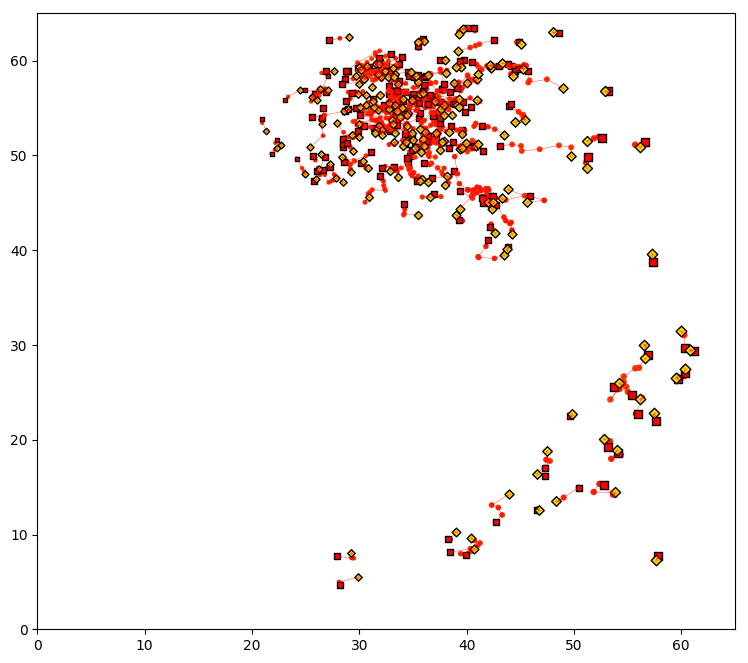

In [36]:
#PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=0
minlong=0
maxlong=20000
#colores=Union{}

for p in values(CatenarioPositivo)
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong) && longus < maxlong
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=0.25, color="r", lw=0.25, zorder=15)
        colores=scatter(xxpos,yypos, s=gordura*0.4, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*0.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" ,
        zorder=1)
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="gold", marker="D", label="Final", zorder=2 )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#savefig("ejemploaltaspositivas-01.svg",dpi=92)

In [31]:
JLD.save

save (generic function with 8 methods)

In [36]:
save(nombreout, "CatenarioPositivo", CatenarioPositivo, "CatenarioNegativo", CatenarioNegativo, "notatray", nota)